<a href="https://colab.research.google.com/github/a7madmostafa/DNN_MNIST/blob/main/DNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, accuracy_score

In [6]:
class myCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
          print("\nReached 99% accuracy so cancelling training!")
          self.model.stop_training = True

In [7]:
# Load Data
(x_train, y_train),(x_test, y_test) =  fashion_mnist.load_data()

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

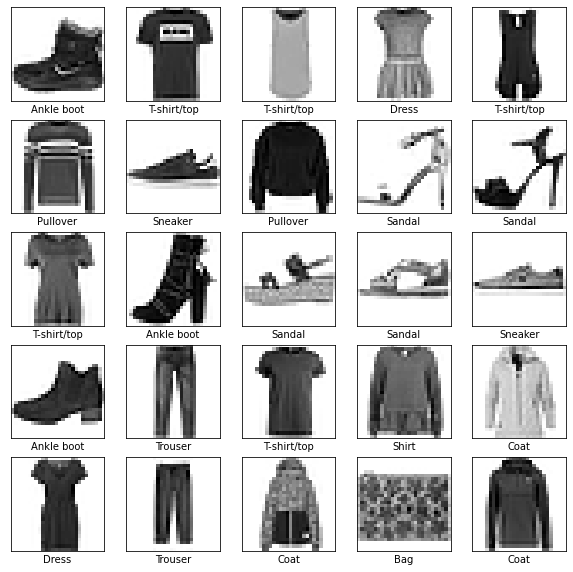

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [12]:
# Scaling
x_train = x_train/255.0
x_test = x_test/255.0

In [13]:
# Model Building
model = Sequential([Flatten(),
                    Dense(100, activation='relu'),
                    Dense(10, activation='softmax')])

In [14]:
# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Fitting
history = model.fit(x_train, y_train, validation_data =(x_test, y_test), epochs=10, callbacks=[myCallback()])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6470 - accuracy: 0.7741 - val_loss: 0.4492 - val_accuracy: 0.8349
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3886 - accuracy: 0.8632 - val_loss: 0.4135 - val_accuracy: 0.8499
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3466 - accuracy: 0.8731 - val_loss: 0.3975 - val_accuracy: 0.8606
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3208 - accuracy: 0.8823 - val_loss: 0.3643 - val_accuracy: 0.8728
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3020 - accuracy: 0.8901 - val_loss: 0.3449 - val_accuracy: 0.8762
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2883 - accuracy: 0.8942 - val_loss: 0.3397 - val_accuracy: 0.8787
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2769 - accuracy: 0.8973 - val_loss: 0.3521 - val_accuracy:

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


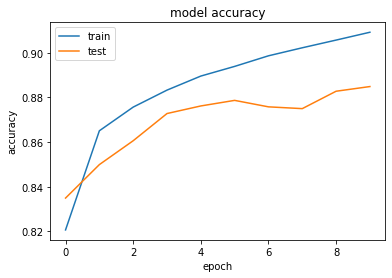

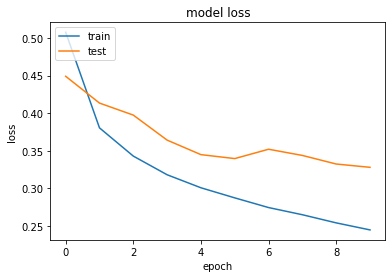

In [17]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
y_pred = np.argmax(model.predict(x_test), axis=-1) 
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [19]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 946us/step - loss: 0.3281 - accuracy: 0.8849


[0.3280796408653259, 0.8848999738693237]

In [20]:
confusion_matrix(y_test, y_pred)

array([[871,   0,  21,  11,   4,   1,  87,   0,   5,   0],
       [  6, 966,   1,  19,   3,   0,   4,   0,   1,   0],
       [ 25,   2, 827,   8,  76,   0,  61,   0,   1,   0],
       [ 46,   6,  14, 846,  51,   0,  33,   0,   4,   0],
       [  0,   1, 102,  17, 823,   0,  56,   0,   1,   0],
       [  0,   0,   0,   0,   0, 955,   0,  27,   1,  17],
       [147,   0, 103,  14,  58,   0, 669,   0,   9,   0],
       [  0,   0,   0,   0,   0,   9,   0, 976,   0,  15],
       [  7,   0,   4,   4,   5,   2,   2,   4, 972,   0],
       [  1,   0,   0,   0,   0,   5,   0,  50,   0, 944]])

In [21]:
accuracy_score(y_test, y_pred)

0.8849

In [22]:
predictions = model.predict(x_test)

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

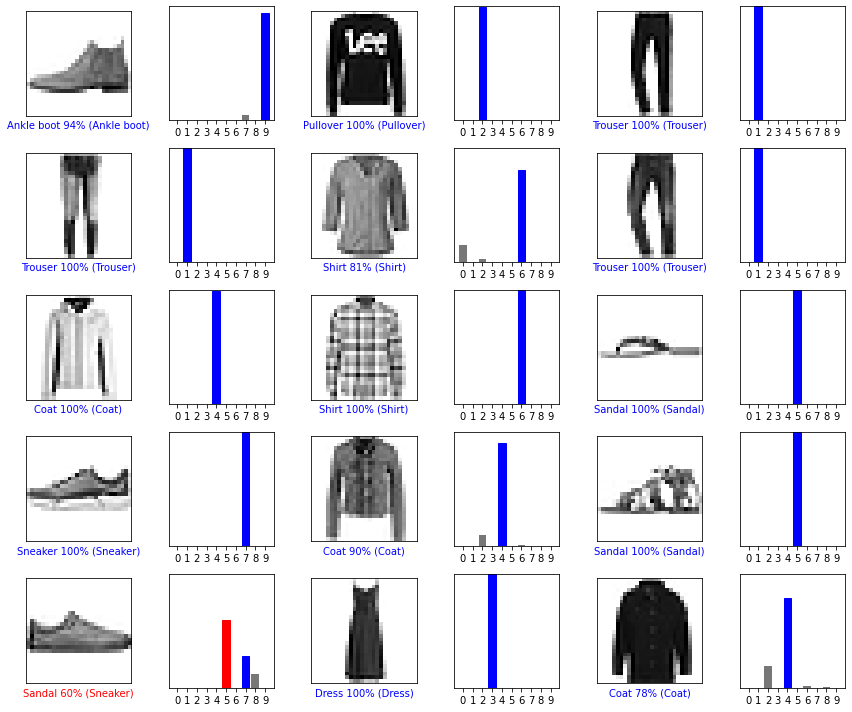

In [26]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()